<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/Week_7_Responsi_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kwandy Chandra - 0706022210001**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [377]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor Random Forest dari scikit-learn untuk membangun model klasifikasi berbasis Random Forest.
from sklearn.ensemble import RandomForestClassifier
# Mengimpor Gradient Boosting Classifier dari scikit-learn untuk membangun model klasifikasi berbasis Gradient Boosting.
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## Load Dataset

In [378]:
# Mengambil dataset dari URL menggunakan Pandas dan membacanya sebagai DataFrame dengan pemisah koma (';').
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/Bank.csv"
df = pd.read_csv(url, delimiter=';')
# Menampilkan 10 sampel acak dari DataFrame untuk mendapatkan gambaran umum tentang data.
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
529,40,management,married,tertiary,no,1584,yes,no,telephone,21,nov,661,1,-1,0,unknown,no
346,57,management,married,tertiary,no,1602,no,no,cellular,29,jul,339,3,-1,0,unknown,no
265,40,self-employed,married,secondary,no,1516,yes,yes,unknown,23,may,373,1,-1,0,unknown,no
2987,35,services,married,secondary,no,128,yes,no,cellular,12,may,136,1,-1,0,unknown,no
1368,37,self-employed,single,tertiary,no,556,no,no,unknown,17,jun,200,2,-1,0,unknown,no
496,50,housemaid,married,secondary,no,7317,yes,no,cellular,13,may,172,1,370,1,failure,no
268,38,admin.,single,secondary,no,902,yes,no,telephone,31,jul,58,13,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
3416,30,management,single,tertiary,no,47,no,yes,cellular,31,jul,11,17,-1,0,unknown,no
187,37,services,single,secondary,no,21,yes,no,cellular,2,feb,96,1,271,2,other,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [379]:
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah entri,
# jumlah non-null, tipe data tiap kolom, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [380]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame,
# termasuk jumlah, rata-rata, standar deviasi, nilai minimum, dan persentil.
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [381]:
# Menghitung jumlah kemunculan setiap value dalam kolom 'y', termasuk nilai NaN (jika ada).
y_counts = df['y'].value_counts(dropna=False)

#Display the Result
y_counts

,count
y,
no,4000
yes,521


In [382]:
# Check for any remaining missing values
df_cleaned = df.isnull().sum()

# Display the result
df_cleaned

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


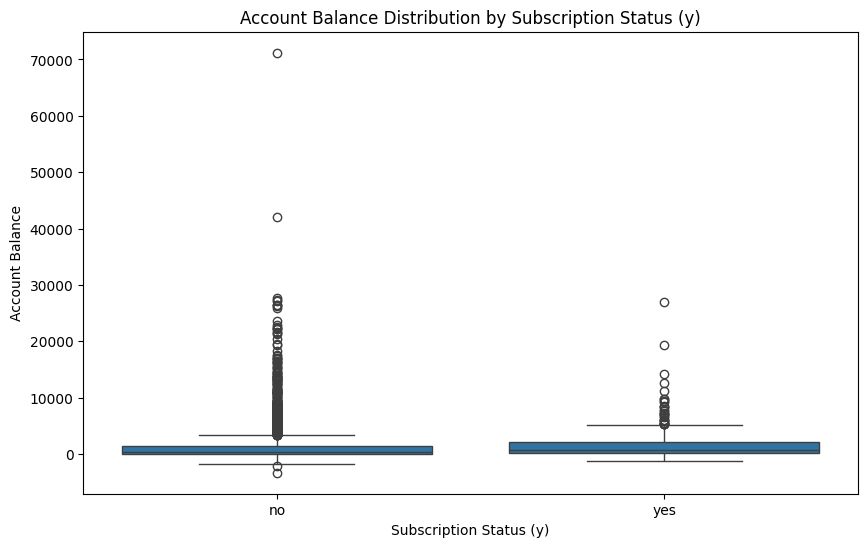

In [383]:
# Visualization 1: Distribution of account balance by subscription status
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Account Balance Distribution by Subscription Status (y)')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Account Balance')
plt.show()

# The boxplot shows that clients with higher account balances are more likely to
# subscribe (indicated by 'y' = yes). This suggests that clients with better
# financial standing may be more inclined to invest in term deposits.

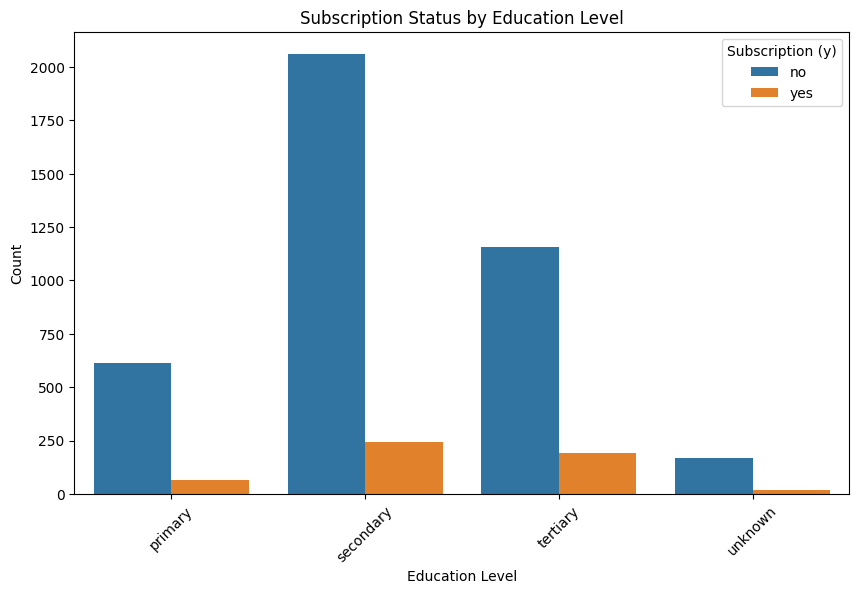

In [384]:
# Visualization 2: Subscription rate by education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Subscription Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Subscription (y)', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# This count plot reveals that clients with tertiary education have a higher rate
# of term deposit subscriptions. This insight suggests that education level,
# especially higher education, may positively influence the likelihood of
# subscribing.

In [385]:
# Mengambil nilai unik dari kolom y untuk mengetahui yang terdapat dalam DataFrame.
unique_y = df['y'].unique()
# Menampilkan array y unique yang ditemukan dalam dataset.
print(unique_y)

['no' 'yes']


In [386]:
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik.
label_encoder = LabelEncoder()

# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['job'] = label_encoder.fit_transform(df['job'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['marital'] = label_encoder.fit_transform(df['marital'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['education'] = label_encoder.fit_transform(df['education'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['default'] = label_encoder.fit_transform(df['default'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['housing'] = label_encoder.fit_transform(df['housing'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['loan'] = label_encoder.fit_transform(df['loan'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['contact'] = label_encoder.fit_transform(df['contact'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['month'] = label_encoder.fit_transform(df['month'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['y'] = label_encoder.fit_transform(df['y'])
# Menampilkan 5 sampel acak dari DataFrame setelah pengkodean.
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4128,34,0,0,1,0,1268,1,0,0,15,8,259,3,-1,0,3,0
2010,31,4,2,2,0,1494,0,0,0,13,1,275,12,-1,0,3,0
3980,45,1,1,1,0,784,1,1,2,3,6,34,1,-1,0,3,0
55,48,0,1,1,0,3064,1,0,1,15,5,159,2,-1,0,3,0
245,36,4,1,2,0,0,1,0,0,28,4,60,1,250,1,1,0


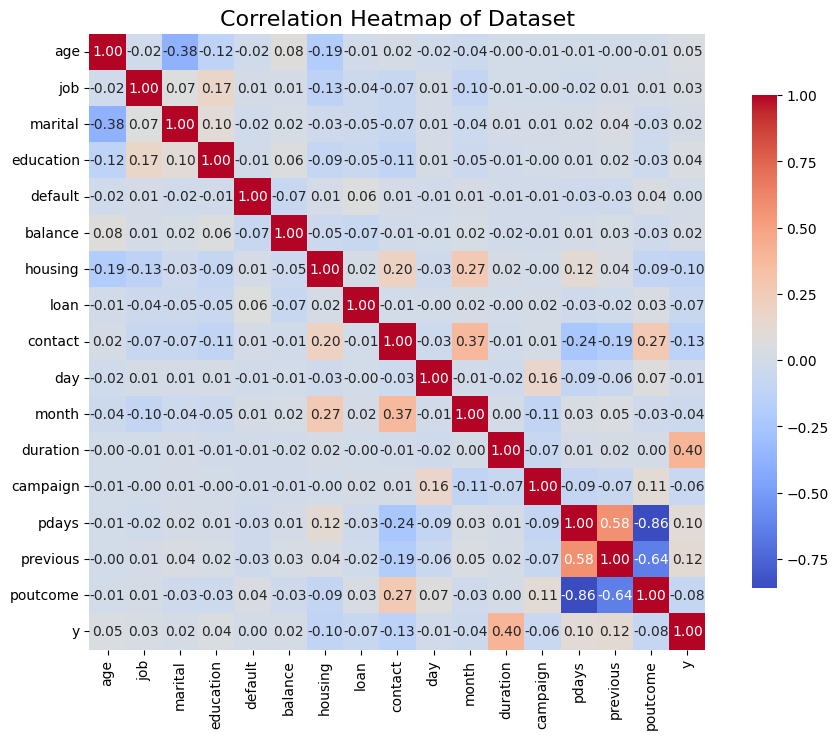

In [387]:
# Menghitung matriks korelasi untuk DataFrame untuk melihat hubungan antara fitur-fitur numerik.
correlation_matrix = df.corr()

# Mengatur ukuran figure untuk visualisasi heatmap.
plt.figure(figsize=(12, 8))
# Membuat heatmap untuk matriks korelasi dengan anotasi nilai korelasi, menggunakan palet warna 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul pada heatmap.
plt.title('Correlation Heatmap of Dataset', fontsize=16)
# Menampilkan heatmap.
plt.show()

## Machine Learning (Split Data)

In [388]:
# dari heatmap bisa dilihat 3 variabel terbaik yang paling relate dengan y adalah
# duration, pdays, previous  karena yang correlationnya rendah dianggap tidak penting

# karena ketika menggunakan semua variabel, saya mendapatkan bahwa accuracy
# training langsung 1.00 sementara testingnya jauh berbeda yang berarti overfitting

In [389]:
# Menghapus kolom 'y' dari DataFrame untuk membentuk fitur (X) yang akan digunakan dalam model.
X = df[['duration', 'pdays', 'previous']]
# Menetapkan kolom 'y' sebagai target variabel (y) yang akan diprediksi oleh model.
y = df['y']

In [390]:
# Membagi dataset menjadi set pelatihan (80%) dan set pengujian (20%) dengan menggunakan fungsi train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [391]:
# Apply SMOTEENN on training data
smoteenn = SMOTE(random_state=0)  # Initialize SMOTEENN for resampling
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)  # Resample to balance classes

In [392]:
# Standardize features for consistent scaling
scaler = StandardScaler()  # Initialize standard scaler
X_train = scaler.fit_transform(X_train)
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data using same scaling

In [394]:
# Menampilkan dimensi dari set pelatihan (X_train) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_train.shape)
# Menampilkan dimensi dari set pengujian (X_test) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_test.shape)

(3616, 3)
(905, 3)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [395]:
# Define the Random Forest model
rf = RandomForestClassifier(max_depth=50, n_estimators=200, random_state=0)
rf_smote = RandomForestClassifier(max_depth=50, n_estimators=200, random_state=0)
rf_smote.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=0)

In [396]:
rf_predictions = rf.predict(X_test)
rf_smote_predictions = rf_smote.predict(X_test)
  # Predict with random forest on test data

In [397]:
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_rf_smote = rf_smote.score(X_train_resampled, y_train_resampled)
train_score_rf = rf.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_rf_smote = accuracy_score(y_test, rf_smote_predictions)
test_score_rf = accuracy_score(y_test, rf_predictions)

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_rf:.4f}")
print(f"Training set score smote: {train_score_rf_smote:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_rf:.4f}")
print(f"Test set score smote: {test_score_rf_smote:.4f}")

Training set score: 0.9591
Training set score smote: 0.8828
Test set score: 0.8895
Test set score smote: 0.7713


In [398]:
# Menghitung matriks kebingungan untuk model dengan membandingkan nilai prediksidan nilai sebenarnya
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
conf_matrix_rf_smote = confusion_matrix(y_test, rf_smote_predictions)

# Menampilkan matriks confusion model.
print("Confusion Matrix Entropy:\n", conf_matrix_rf)
print("Confusion Matrix Entropy:\n", conf_matrix_rf_smote)

Confusion Matrix Entropy:
 [[781  12]
 [ 88  24]]
Confusion Matrix Entropy:
 [[638 155]
 [ 52  60]]


In [399]:
# Menghitung laporan klasifikasi untuk model yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_rf = classification_report(y_test, rf_predictions)
class_report_rf_smote = classification_report(y_test, rf_smote_predictions)
# Menampilkan laporan klasifikasi untuk model.
print("Classification Report:\n", class_report_rf)
print("Classification Report:\n", class_report_rf_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       793
           1       0.67      0.21      0.32       112

    accuracy                           0.89       905
   macro avg       0.78      0.60      0.63       905
weighted avg       0.87      0.89      0.86       905

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       793
           1       0.28      0.54      0.37       112

    accuracy                           0.77       905
   macro avg       0.60      0.67      0.61       905
weighted avg       0.84      0.77      0.80       905



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [400]:
# Define the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=200, random_state=10)
gb_smote = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=200, random_state=10)
# gb.fit(X_train_resampled, y_train_resampled)
gb.fit(X_train, y_train)
gb_smote.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=200,
                           random_state=10)

In [401]:
gb_predictions = gb.predict(X_test)
gb_smote_predictions = gb_smote.predict(X_test)
  # Predict with gradient boosting on test data

In [402]:
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_gb_smote = gb_smote.score(X_train_resampled, y_train_resampled)
train_score_gb = gb.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_gb = accuracy_score(y_test, gb_predictions)
test_score_gb_smote = accuracy_score(y_test, gb_smote_predictions)

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_gb:.4f}")
print(f"Training set score SMOTE: {train_score_gb_smote:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_gb:.4f}")
print(f"Test set score SMOTE: {test_score_gb_smote:.4f}")

Training set score: 0.9591
Training set score SMOTE: 0.8828
Test set score: 0.8829
Test set score SMOTE: 0.7945


In [403]:
# Menghitung matriks kebingungan untuk model dengan membandingkan nilai prediksidan nilai sebenarnya
conf_matrix_gb = confusion_matrix(y_test, gb_predictions)
conf_matrix_gb_smote = confusion_matrix(y_test, gb_smote_predictions)

# Menampilkan matriks confusion model.
print("Confusion Matrix Entropy:\n", conf_matrix_gb)
print("Confusion Matrix Entropy:\n", conf_matrix_gb_smote)

Confusion Matrix Entropy:
 [[773  20]
 [ 86  26]]
Confusion Matrix Entropy:
 [[651 142]
 [ 44  68]]


In [404]:
# Menghitung laporan klasifikasi untuk model yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_gb = classification_report(y_test, gb_predictions)
class_report_gb_smote = classification_report(y_test, gb_smote_predictions)
# Menampilkan laporan klasifikasi untuk model.
print("Classification Report:\n", class_report_gb)
print("Classification Report:\n", class_report_gb_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       793
           1       0.57      0.23      0.33       112

    accuracy                           0.88       905
   macro avg       0.73      0.60      0.63       905
weighted avg       0.86      0.88      0.86       905

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       793
           1       0.32      0.61      0.42       112

    accuracy                           0.79       905
   macro avg       0.63      0.71      0.65       905
weighted avg       0.86      0.79      0.82       905



CONLUSION

In [405]:
gap_gb = train_score_gb - test_score_gb
gap_gb_smote = train_score_gb_smote - test_score_gb_smote
gap_rf = train_score_rf -  test_score_rf
gap_rf_smote = train_score_rf_smote - test_score_rf_smote

In [406]:
# Calculate and display the performance gap for each model
print("Performance Gaps (Train - Test):")
print("-" * 30)
print(f"Gradient Boosting (Original): {gap_gb:.4f}")
print(f"Gradient Boosting (SMOTE):    {gap_gb_smote:.4f}")
print("-" * 30)
print(f"Random Forest (Original):     {gap_rf:.4f}")
print(f"Random Forest (SMOTE):        {gap_rf_smote:.4f}")
print("-" * 30)

Performance Gaps (Train - Test):
------------------------------
Gradient Boosting (Original): 0.0762
Gradient Boosting (SMOTE):    0.0883
------------------------------
Random Forest (Original):     0.0696
Random Forest (SMOTE):        0.1115
------------------------------


In [407]:
# ini berarti untuk dataset ini sebenarnya tidak memerlukan smoteen karena
# gap akurasi testing dan training ketika memakai smoteen lebih besar

# yang mana berarti smoteen tidak selamanya efektif, seperti contohnya di kasus ini
# smoteen malah mendapatkan accuracy yang lebih jelek dan training test gapnya lebih besar

In [408]:
# sebelumnya untuk parameter RF dan GB saya menggunakan gridsearchcv untuk menvcari best parameter untuk model tersebut
# Notes : GridSearchCV belajar dari pak edwin